# Group Project Datasets Fall 2025 

|Helpful Links|
|---|
|[Elements of Data Science Primer](https://laserchemist.github.io/dprimer/intro.html)|
|[Inferential Thinking](https://inferentialthinking.com/chapters/intro.html)|
|[Data Science Toolkit examples](https://temple.2i2c.cloud/hub/user-redirect/lab/tree/datascience/Fall%202024/DataScience_Toolkit.ipynb)|

### Your group has been assigned one of the following data sets.
This notebook contains:
* The code to load each of the data sets
* References to the source and possible metadata
* Data cleaning issues to consider
* One or two ideas for relationships to explore, but do not feel constrained -- explore the data use your imagination to find other possibilities!

## Dataset Areas
<ul>
      <li><a href="#Bioinformatics">Bioinformatics</a></li>
      <li><a href="#Chemistry">Chemistry</a></li>
      <li><a href="#Environmental Science">Environmental Science</a>
      <li><a href="#Ecology">Ecology</a>
      <li><a href="#General">General</a>
      <li><a href="#Medical">Public Health and Medical</a>
        </li>
</ul>

In [ ]:
# Import Numpy and Datascience modules.
import numpy as np
import pandas as pd
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline

Useful auxiliary data (can use .join() to merge with your data where appropriate)

**US population by zip code (source census.gov)**

In [ ]:
zippop = Table().read_table('data/census_pop_byzip.csv',dtype=str)

In [ ]:
zippop.where('zip code','19122')

**World population by country and year (source: UN)**

In [ ]:
worldpop = Table().read_table('data/WPP2024.csv', low_memory=False)

In [ ]:
worldpop.where('Country','France').show(3)

## **Bioinformatics Datasets** <a id="Bioinformatics"></a>

---
# Human Microbiome Diversity (DS17)

### Background:
The human body hosts trillions of microorganisms (bacteria, archaea, fungi) that vary by body site (gut, skin, oral cavity). The gut microbiome is particularly diverse with 500-1000 bacterial species. Microbial community composition affects health, digestion, immunity, and disease. Researchers classify bacteria by taxonomic levels (phylum, class, order, family, genus, species). Body site, diet, age, geography, and health status all influence microbiome composition. Common measurements include species richness (# of species), Shannon diversity index, and relative abundance of taxa.

### **<font color=green>You are not alone!**
Your body is home to approximately 38 trillion microorganisms—bacteria, archaea, fungi, and viruses. That's actually MORE microbial cells than human cells! Don't worry—most are helpful or harmless.
What is the microbiome?
The microbiome is the community of all microorganisms living in and on your body. Different body sites have different communities:

- Gut (digestive tract): Most diverse, 500-1000 bacterial species
- Skin: Adapted to dry, salty conditions
- Mouth: Different bacteria live on teeth, tongue, cheeks
- Other sites: Nose, lungs, reproductive tract

#### The Gut Microbiome—A Focus for Research:
Your gut microbiome:

Helps digest food (especially fiber we can't break down)
Makes vitamins (like vitamin K and some B vitamins)
Trains your immune system
Protects against harmful bacteria
Communicates with your brain (the "gut-brain axis")

- Key Bacterial Phyla in Your Gut:

Firmicutes: Large group including many beneficial species
Bacteroidetes: Break down complex carbohydrates
Proteobacteria: Includes E. coli; some helpful, some harmful
Actinobacteria: Includes Bifidobacterium (common in infants)

- What Shapes Your Microbiome?

Diet: Different foods feed different bacteria
Antibiotics: Kill bacteria indiscriminately, disrupting balance
Age: Infant, adult, and elderly microbiomes differ
Geography: People in different countries have different microbiomes
Health status: Disease can change the microbiome (and vice versa!)

- Measuring Microbiome Diversity:
Species Richness: Simply counting how many different species are present

More species = more diverse
Like counting how many different tree species are in a forest

- Shannon Diversity Index: Considers both richness AND evenness

Accounts for how evenly distributed species are
Higher number = more diverse
A forest with 100 tree species where one makes up 99% of trees is less diverse than one where species are evenly distributed

- The Firmicutes/Bacteroidetes Ratio (F/B Ratio):
This ratio has been linked to:

Obesity (higher ratio often seen in obese individuals)
Diet (changes with Western vs. traditional diets)
Various diseases

But it's controversial—not all studies agree on its importance!
Dysbiosis = Imbalance:
When the microbiome gets out of balance (dysbiosis), it's associated with:

Inflammatory bowel diseases (Crohn's, ulcerative colitis)
Obesity and metabolic syndrome
Allergies and autoimmune diseases
Mental health (depression, anxiety)
Infections (when harmful bacteria take over)

### Possible Research Questions to Explore:

- Health vs. disease: Do healthy people have more diverse microbiomes than people with disease? 
- Diet effects: Do vegetarians have different microbiome composition or diversity than omnivores?
- Age correlation: Does microbiome diversity decrease with age? 
- F/B ratio differences: Is the Firmicutes/Bacteroidetes ratio really different between healthy and disease groups?
- Body site comparison: How different is gut microbiome diversity compared to skin or oral cavity?
- Antibiotic impact (if data available): Do people who recently took antibiotics have lower diversity?
- Geographic patterns: Do people from different regions/countries have characteristic microbiome signatures?
- Stability: Do individuals have consistent microbiomes over time, or does it fluctuate?

### Authoritative Sources:

- NIH Human Microbiome Project Overview:

[https://www.hmpdacc.org/overview/](https://www.hmpdacc.org/overview/)<br>
[https://commonfund.nih.gov/hmp](https://commonfund.nih.gov/hmp)


- American Gut Project: Citizen science project that analyzed thousands of gut microbiomes

[http://americangut.org/](http://americangut.org/) 


- Harvard Medical School: The Microbiome

[https://www.hsph.harvard.edu/nutritionsource/microbiome/](https://www.hsph.harvard.edu/nutritionsource/microbiome/)


- Nature: The Human Microbiome (Review Article)

[https://www.nature.com/articles/nature11234](https://www.nature.com/articles/nature11234)


- NIH News in Health: Keeping Your Gut in Check

[https://newsinhealth.nih.gov/2017/05/keeping-your-gut-check](https://newsinhealth.nih.gov/2017/05/keeping-your-gut-check)

## Possible Questions

- Gut microbiome diversity (Shannon index) is the same in healthy individuals as in those with disease X

Simulation: Two-sample permutation test shuffling health status labels


- The proportion of Firmicutes vs. Bacteroidetes (two major phyla) is the same across different body sites
- Individuals on vegetarian diets have the same mean microbiome richness (# species) as omnivores

Simulation: Bootstrap confidence intervals for difference in means
- Geographic location is independent of dominant bacterial phylum

Simulation: Permutation test comparing regional microbiome profiles
- Age is correlated with microbiome diversity

Simulation: Permutation test for correlation coefficient


### Data Cleaning Issues:

- Taxonomic classification at different levels
- Relative abundance data (percentages sum to 100%)
- Need to filter low-abundance taxa
- Missing metadata for some samples
- Batch effects from different sequencing runs


In [4]:
# Load microbiome data
microbiome = Table.read_table('data/microbiome_data.csv')
microbiome.show(5)

Sample,Health_Status,Diet,Age,Bacteria,Relative_Abundance
Sample_0,Healthy,Omnivore,48,Firmicutes,5.1509
Sample_0,Healthy,Omnivore,48,Bacteroidetes,38.4503
Sample_0,Healthy,Omnivore,48,Proteobacteria,23.0908
Sample_0,Healthy,Omnivore,48,Actinobacteria,15.0039
Sample_0,Healthy,Omnivore,48,Verrucomicrobia,2.67733


## Helpful background code

Total measurements: 3000
Unique samples: 500
Bacterial taxa: ['Actinobacteria' 'Bacteroidetes' 'Firmicutes' 'Other' 'Proteobacteria'
 'Verrucomicrobia']


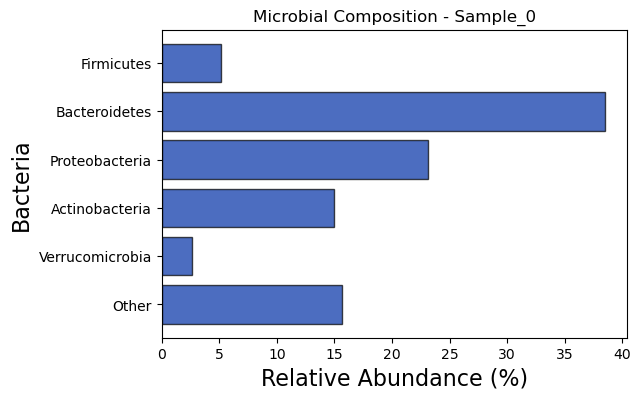

In [5]:
print("Total measurements:", microbiome.num_rows)
print("Unique samples:", len(np.unique(microbiome.column('Sample'))))
print("Bacterial taxa:", np.unique(microbiome.column('Bacteria')))

# Check sample groups
microbiome.group('Health_Status')
microbiome.group('Diet')

# Visualize one sample's composition
sample1 = microbiome.where('Sample', 'Sample_0')
sample1.barh('Bacteria', 'Relative_Abundance')
plt.xlabel('Relative Abundance (%)')
plt.title('Microbial Composition - Sample_0')

# Calculate diversity metrics for each sample
def shannon_diversity(abundances):
    """
    Calculate Shannon diversity index
    H = -sum(p_i * log(p_i))
    where p_i is proportion of species i
    """
    # Convert percentages to proportions
    proportions = abundances / 100.0
    # Remove zeros to avoid log(0)
    proportions = proportions[proportions > 0]
    return -np.sum(proportions * np.log(proportions))

def species_richness(abundances, threshold=1.0):
    """Count number of species above threshold abundance"""
    return np.sum(abundances > threshold)


---
# Gene Expression in Cancer vs. Normal Tissue (DS16)


## Background:
#### What is gene expression?
Your cells all have the same DNA (your genome), but they don't all look or act the same. That's because different cells "express" (turn on) different genes:

- Liver cells express liver genes
- Muscle cells express muscle genes
- Brain cells express brain genes

Gene expression = DNA → RNA → Protein
When a gene is "expressed," the cell:

Copies the DNA into RNA (transcription)
Uses RNA to make proteins (translation)
The more RNA, the more protein usually gets made

#### Measuring Gene Expression:
Scientists can measure how much RNA is made from each gene using techniques like:

- Microarrays: Check thousands of genes at once (older technology)
- RNA-sequencing (RNA-seq): Read all RNA molecules in a sample (newer, more accurate)

The results are numbers showing expression levels—higher numbers mean more of that gene's RNA was present.
What Goes Wrong in Cancer?
Cancer happens when cells grow out of control. This happens because gene expression goes haywire:
Oncogenes (cancer-causing genes):

##### Normally help cells grow and divide
- In cancer: OVEREXPRESSED (too much RNA/protein)
-   Examples: MYC, RAS, HER2
Like having your car's gas pedal stuck down

#### Tumor Suppressor Genes:

- Normally stop cells from dividing too much or repair DNA damage
- In cancer: UNDEREXPRESSED (too little RNA/protein)
- Examples: TP53 (the "guardian of the genome"), BRCA1, BRCA2
- Like having your car's brakes cut

#### Why Study Gene Expression in Cancer?

- Diagnosis: Different cancers have different expression "signatures"
- Prognosis: Expression patterns predict how aggressive a cancer is
- Treatment: Some therapies target overexpressed proteins (like Herceptin for HER2+ breast cancer)
- Understanding biology: Reveals which cellular pathways are broken

#### Fold Change:
Scientists often talk about "fold change"—how many times more (or less) a gene is expressed:

- 2-fold increase = twice as much RNA
- 0.5-fold (or 2-fold decrease) = half as much RNA
- Typically, changes >2-fold or <0.5-fold are considered biologically significant

### Possible Research Questions to Explore:

How many genes are dysregulated? What proportion of genes show significantly different expression in cancer vs. normal tissue?
Upregulation vs. downregulation: Are more genes turned up or turned down in cancer? Or is it balanced?
Magnitude of changes: Do cancer-related genes (known oncogenes/tumor suppressors) show bigger fold changes than random genes?
Consistency across samples: Do all cancer samples show similar patterns, or is there variation between patients?
Gene families: Are related genes (genes in the same pathway) all changed together, or are changes scattered?
Correlation patterns: Do certain genes always change together? This might reveal pathways or regulatory networks.
Clinical correlation (if survival data available): Do patients with higher expression of gene X survive longer than those with lower expression?

### Questions (Good starting points):

- Is gene X differently expressed in cancer vs normal?

- Hypothesis: Mean expression is the same in both groups
Test: Two-sample permutation test


- How many genes show differences?

Calculate fold change for all genes
Count how many are >2-fold or <0.5-fold different


- Are more genes up-regulated or down-regulated?

Count genes with cancer > normal vs cancer < normal
Test if proportions are equal



#### Medium Questions (Require more analysis):

- Do all cancer samples behave similarly?

- Calculate expression variance within cancer samples
Compare to variance within normal samples


- Are certain genes always changed together?

- Test correlation between pairs of genes
Look for co-regulated gene sets


- What's the typical magnitude of change?

Calculate distribution of fold changes
Find the median, 25th and 75th percentiles



#### Challenging Questions (For advanced groups):

- Can we identify gene signatures?

Find combinations of genes that best separate cancer from normal
Requires testing multiple genes together


- Are expression patterns consistent across sample types?

If dataset includes different cancer types or stages
Compare patterns between subtypes

## Authoritative Sources:

National Cancer Institute: What is Cancer?

https://www.cancer.gov/about-cancer/understanding/what-is-cancer


National Cancer Institute: Gene Expression

https://www.cancer.gov/publications/dictionaries/cancer-terms/def/gene-expression


The Cancer Genome Atlas (TCGA): Major cancer genomics project

https://www.cancer.gov/ccg/research/genome-sequencing/tcga


Nature Education: Gene Expression

https://www.nature.com/scitable/topicpage/gene-expression-14121669/


American Cancer Society: Understanding Your Cancer

https://www.cancer.org/cancer/managing-cancer/understanding-cancer.html

## Our data: GSE15852: Breast Cancer Gene Expression Dataset
- Basic Information
<br>Title: Expression data from human breast tumors and their paired normal tissues
<br>Organism: Human (Homo sapiens)
<br>Platform: Affymetrix Human Genome U133A Array (GPL96)
<br>Publication Date: April 28, 2009
<br>Source: Institute for Medical Research, Malaysia

### Study Design
This study compared gene expression patterns in 43 breast tumors and their paired normal control tissues from the same patients, for a total of 86 samples NCBI.
Key Features:

#### Paired design: Each patient contributed both tumor tissue AND adjacent normal tissue
Multi-ethnic cohort: First study on gene expression profiling of multi-ethnic Malaysian breast cancer patients (Malays, Chinese, and Indian) NCBI
<br>Sample size: 43 cancer samples and 43 normal samples Frontiers
<br>Technology: Affymetrix microarray (that's why you see probe IDs!)

In [35]:
# Load the gene expression data
expr = Table.read_table('data/gene_expression_with_symbols.csv')

print("\nFirst few rows:")
expr.show(5)

print("\nDataset summary:")
print(f"Total measurements: {expr.num_rows:,}")
print(f"Unique genes: {len(np.unique(expr.column('Gene')))}")
print(f"Unique samples: {len(np.unique(expr.column('Sample')))}")

print("\nSample type distribution:")
sample_counts = expr.group('Sample_Type')
sample_counts.show()


First few rows:


Gene,Gene_Symbol,Sample,Sample_Type,Expression
211696_x_at,HBB,GSM398074,Normal,1335.82
211696_x_at,HBB,GSM398075,Cancer,1041.24
211696_x_at,HBB,GSM398076,Normal,8813.16
211696_x_at,HBB,GSM398077,Cancer,663.099
211696_x_at,HBB,GSM398078,Normal,1188.76



Dataset summary:
Total measurements: 86,000
Unique genes: 1000
Unique samples: 86

Sample type distribution:


Sample_Type,count
Cancer,43000
Normal,43000


---
# Protein Amino Acid Composition Analysis (DS20)
The amino acid composition of proteins differs for different functional classes. Proteins are composed of 20 different amino acids, each with unique chemical properties. The proportion and distribution of these amino acids determines a protein's 3D structure and biological function. You can use simulation-based hypothesis testing to investigate whether proteins from different functional classes have significantly different amino acid compositions.


## Background - Proteins and Amino Acids

### What are proteins?

Proteins are large molecules made from chains of **amino acids**. Think of amino acids like letters in an alphabet - just as 26 letters create all English words, 20 amino acids create all proteins in living organisms.

### The 20 Standard Amino Acids

Each amino acid has:
- A **name** (e.g., Alanine, Glycine, Tryptophan)
- A **three-letter code** (Ala, Gly, Trp)
- A **one-letter code** (A, G, W)
- **Unique chemical properties**

### Chemical Properties

The key property we'll study is whether an amino acid is:
- **Hydrophobic** ("water-fearing") - avoids water, clusters in protein interior
- **Hydrophilic** ("water-loving") - comfortable in water, found on protein surfaces
- **Charged** - carries positive or negative charge
- **Special** - unique structural roles (flexibility, bonding, etc.)

### Why Composition Matters

- **Membrane proteins** need more hydrophobic amino acids (to sit in fatty membrane)
- **Enzymes** need charged amino acids at active sites (for catalysis)
- **Structural proteins** need special amino acids (for flexibility or strength)
- **Transport proteins** need specific arrangements (to bind and release cargo)

### Example Protein Sequence

```
MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDN...
```

Each letter represents one amino acid. This sequence contains all information needed to determine the protein's 3D structure!

## Visualizing Amino Acids (Connection to Lab 10)

### Load Amino Acid Reference Data

Let's load a table with information about all 20 amino acids, including their **SMILES** strings (chemical structure notation) that we can visualize in 3D.

In [4]:
# Load amino acid reference table
amino_acids = Table.read_table('data/amino_acids.csv')
amino_acids

Name,Three_Letter,One_Letter,SMILES,Property,Description
Alanine,Ala,A,C[C@H](N)C(O)=O,Hydrophobic,"Small, nonpolar"
Arginine,Arg,R,NC(NCCCC(N)C(O)=O)=[NH2+],Charged (+),"Basic, positively charged"
Asparagine,Asn,N,NC(=O)CC(N)C(O)=O,Hydrophilic,"Polar, uncharged"
Aspartic acid,Asp,D,OC(=O)CC(N)C(O)=O,Charged (-),"Acidic, negatively charged"
Cysteine,Cys,C,SC[C@H](N)C(O)=O,Special,Forms disulfide bonds
Glutamine,Gln,Q,NC(=O)CCC(N)C(O)=O,Hydrophilic,"Polar, uncharged"
Glutamic acid,Glu,E,OC(=O)CCC(N)C(O)=O,Charged (-),"Acidic, negatively charged"
Glycine,Gly,G,NCC(O)=O,Special,"Smallest, most flexible"
Histidine,His,H,NC(Cc1cnc[nH]1)C(O)=O,Charged (+),Can be charged or neutral
Isoleucine,Ile,I,CC[C@H](C)[C@H](N)C(O)=O,Hydrophobic,"Branched, nonpolar"


### Visualize Amino Acid Structures

Using the SMILES strings and RDKit (same library as Lab 10), we can display the 2D and 3D structures of amino acids.

In [5]:
# Import RDKit for molecular visualization (like Lab 10)
try:
    from rdkit import Chem
    from rdkit.Chem import Draw
    from rdkit.Chem import AllChem
    rdkit_available = True
except ImportError:
    print("RDKit not available - skipping 3D visualization")
    rdkit_available = False

RDKit not available - skipping 3D visualization


In [6]:
def display_amino_acid_2D(one_letter_code):
    """Display 2D structure of an amino acid given its one-letter code"""
    if not rdkit_available:
        print("RDKit not available")
        return
    
    # Get SMILES for this amino acid
    aa_row = amino_acids.where('One_Letter', one_letter_code)
    if aa_row.num_rows == 0:
        print(f"Amino acid {one_letter_code} not found")
        return
    
    name = aa_row.column('Name').item(0)
    smiles = aa_row.column('SMILES').item(0)
    property_type = aa_row.column('Property').item(0)
    
    # Create molecule and display
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        print(f"{name} ({one_letter_code}) - {property_type}")
        return Draw.MolToImage(mol, size=(300, 300))
    else:
        print(f"Could not create molecule for {name}")

# Example: Display Alanine (hydrophobic) and Lysine (charged)
if rdkit_available:
    print("Hydrophobic example:")
    display(display_amino_acid_2D('A'))  # Alanine
    
    print("\nCharged example:")
    display(display_amino_acid_2D('K'))  # Lysine

**<font color='#9E1B34'>Explore:</font>** Try displaying other amino acids:
- Hydrophobic: V, I, L, M, F, W, P
- Hydrophilic: S, T, N, Q
- Charged positive: K, R, H
- Charged negative: D, E
- Special: G (smallest), C (forms bonds), Y (aromatic)

## Load and Explore the Protein Dataset

### The Dataset

We have 200 proteins from four functional classes:
- **Enzymes** (50) - catalyze chemical reactions
- **Membrane proteins** (50) - embedded in cell membranes
- **Structural proteins** (50) - provide mechanical support  
- **Transport proteins** (50) - move molecules around

Each protein includes:
- Protein ID and name
- Functional class
- Amino acid sequence
- Length and organism

In [8]:
# Load the protein dataset
proteins = Table.read_table('data/protein_sequences.csv')
proteins.show(5)

Protein_ID,Name,Function_Class,Sequence,Length,Organism
P00001,Lactase,Enzyme,DKMLLGHDVQGAVLTHCAHLWTQYAKHWRMIQQGSWDNFCMQPDQKHMQGQGHQMV ...,399,Yeast
P00002,Amylase,Enzyme,QKYCYSMQWNQQHDTWQDYYGMNLRCYQPPGHPIDMYDLMQTTGQQYCVYRCQWQW ...,336,C. elegans
P00003,Pepsin,Enzyme,STTEHVGTKQDAQECPYDKYYPSLELRGGTYIGATYMPDEEERPQVQRNCQAKKHA ...,324,Human
P00004,Trypsin,Enzyme,TCDWPNWIWVPQNSELQYLNGQCHFQWQDKRVLAAYTIQGQQLNGDMGIMKKHAGA ...,480,Mouse
P00005,Catalase,Enzyme,RMDQKYGVFKSYQTPYIGSEAETKLDYMWPEKHLNRSQMDNQEEQFIEHPFMGWSW ...,489,C. elegans


In [9]:
# Examine the data structure
print("Column labels:", proteins.labels)
print("Number of proteins:", proteins.num_rows)

Column labels: ('Protein_ID', 'Name', 'Function_Class', 'Sequence', 'Length', 'Organism')
Number of proteins: 200


In [10]:
# How many proteins in each functional class?
proteins.group('Function_Class')

Function_Class,count
Enzyme,50
Membrane,50
Structural,50
Transport,50


### Examining a Protein Sequence

Let's look at one protein's sequence in detail:

In [11]:
# Get first protein
example = proteins.row(0)
print("Protein:", example.item('Name'))
print("Class:", example.item('Function_Class'))
print("Length:", example.item('Length'), "amino acids")
print("\nSequence:")
print(example.item('Sequence'))

Protein: Lactase
Class: Enzyme
Length: 399 amino acids

Sequence:
DKMLLGHDVQGAVLTHCAHLWTQYAKHWRMIQQGSWDNFCMQPDQKHMQGQGHQMVLSQMYNIRFGMQGLIYEEGFSLGEQMSTEDYQPDYKGCHNWWFDTHQVSGIIWVQYEYGVYHYGNWIQGYIHSMLTQTHDCQQASNMLKKVVQVITQIEYLDNEERPGTLVRDLHLDVDTQANVQYPDGHHPLYQDSSEYYYEAVGRFVDLLHEDWDMQDDYDKASLIQQYDYKKQAEMPEWQQQNLQCQQGACYCIKQDKVHQWKGDDECFYGYQRRGEEYGSQVKLCRIRVLYNIRYAEVIRKDDQRCGFTMPQGDQMAARDEIQEHKSVTGFIWIGENANTLSNHEITDKYDIFELRQHSESRQTQQMLLALEFNGMYWFDDYDYAVYYQQCGQQYSYGL



## Key Function - Calculating Amino Acid Composition

### The Core Function

This function calculates what percentage of a sequence belongs to a specific group of amino acids.

In [12]:
def calculate_aa_composition(sequence, aa_group):
    """
    Calculate the percentage of amino acids in a sequence that belong to a specific group.
    
    Parameters:
    sequence (str): The amino acid sequence (e.g., 'MKTAYIAK...')
    aa_group (str): String of amino acid letters to count (e.g., 'AVILMFWP' for hydrophobic)
    
    Returns:
    float: Percentage (0-100) of sequence made up of amino acids in the group
    
    Example:
    >>> calculate_aa_composition('MVLSPADKTNC', 'AVILMFWP')
    45.45  # 5 out of 11 amino acids are hydrophobic
    """
    count = sum(1 for aa in sequence if aa in aa_group)
    return 100 * count / len(sequence)

# Test the function
test_seq = "MVLSPADKTNC"
hydrophobic_aas = "AVILMFWP"
print(f"Test sequence: {test_seq}")
print(f"Hydrophobic percentage: {calculate_aa_composition(test_seq, hydrophobic_aas):.1f}%")

Test sequence: MVLSPADKTNC
Hydrophobic percentage: 45.5%


### Apply to All Proteins

Let's calculate hydrophobic percentage for ALL proteins in our dataset:

In [17]:
# Define amino acid groups
hydrophobic = "AVILMFWP"
hydrophilic = "STNQC"
charged_positive = "KRH"
charged_negative = "DE"

# Calculate hydrophobic percentage for each protein using apply()

# Calculate for all proteins
hydrophobic_pct = [calculate_aa_composition(seq, hydrophobic) 
                   for seq in proteins.column('Sequence')]

# Add as column
proteins = proteins.with_column('Hydrophobic_%', hydrophobic_pct)

# Display result
proteins

Protein_ID,Name,Function_Class,Sequence,Length,Organism,Hydrophobic_%
P00001,Lactase,Enzyme,DKMLLGHDVQGAVLTHCAHLWTQYAKHWRMIQQGSWDNFCMQPDQKHMQGQGHQMV ...,399,Yeast,31.5789
P00002,Amylase,Enzyme,QKYCYSMQWNQQHDTWQDYYGMNLRCYQPPGHPIDMYDLMQTTGQQYCVYRCQWQW ...,336,C. elegans,31.8452
P00003,Pepsin,Enzyme,STTEHVGTKQDAQECPYDKYYPSLELRGGTYIGATYMPDEEERPQVQRNCQAKKHA ...,324,Human,31.1728
P00004,Trypsin,Enzyme,TCDWPNWIWVPQNSELQYLNGQCHFQWQDKRVLAAYTIQGQQLNGDMGIMKKHAGA ...,480,Mouse,30.4167
P00005,Catalase,Enzyme,RMDQKYGVFKSYQTPYIGSEAETKLDYMWPEKHLNRSQMDNQEEQFIEHPFMGWSW ...,489,C. elegans,30.0613
P00006,DNA Polymerase,Enzyme,MVMFGKKPGEFEHPCTLQYESCDKLHGTFYVLPSYKPGYYACQYAWNQHTVDYNGQ ...,342,E. coli,29.8246
P00007,RNA Polymerase,Enzyme,GGQTQHTHEENVSAYQFMDDSIQQEKSVQCDFQARQQVLCIWGTMQMQTGKYQWQQ ...,489,Mouse,30.6748
P00008,Kinase,Enzyme,CGQYTGTSWKPCGMIVQHTGGQEYDFGHMSAFYMCKMQPQCFAEQFDEGCSTDGAT ...,324,C. elegans,29.9383
P00009,Phosphatase,Enzyme,HQYMNKKAYDGYDCKPDFDLFFIDERAMLLGFNVAKRPWTWPQRHQSRDDPKSYDR ...,235,Human,31.4894
P00010,Lipase,Enzyme,RQYNECWHQQTRPQQEYEKMSEDQQIHDDDLMEHADQDGALYHEYYQRQNLRMQHK ...,213,Mouse,31.9249



## Membrane vs Enzyme Proteins

### Research Question

**Do membrane proteins have higher hydrophobic content than enzymes?**

**Biological Rationale:**  
Membrane proteins must interact with the fatty (hydrophobic) lipid bilayer of cell membranes. Enzymes typically work in the watery cytoplasm. Therefore, we predict membrane proteins will have more hydrophobic amino acids.

### Step 1: Separate the groups and visualize

In [20]:
# Separate proteins by functional class
membrane = proteins.where('Function_Class', 'Membrane')
enzyme = proteins.where('Function_Class', 'Enzyme')

# Calculate means
membrane_mean = np.mean(membrane.column('Hydrophobic_%'))
enzyme_mean = np.mean(enzyme.column('Hydrophobic_%'))

print(f"Membrane proteins - Mean hydrophobic %: {membrane_mean:.2f}")
print(f"Enzyme proteins - Mean hydrophobic %: {enzyme_mean:.2f}")
print(f"Difference: {membrane_mean - enzyme_mean:.2f}%")

Membrane proteins - Mean hydrophobic %: 44.73
Enzyme proteins - Mean hydrophobic %: 30.13
Difference: 14.60%


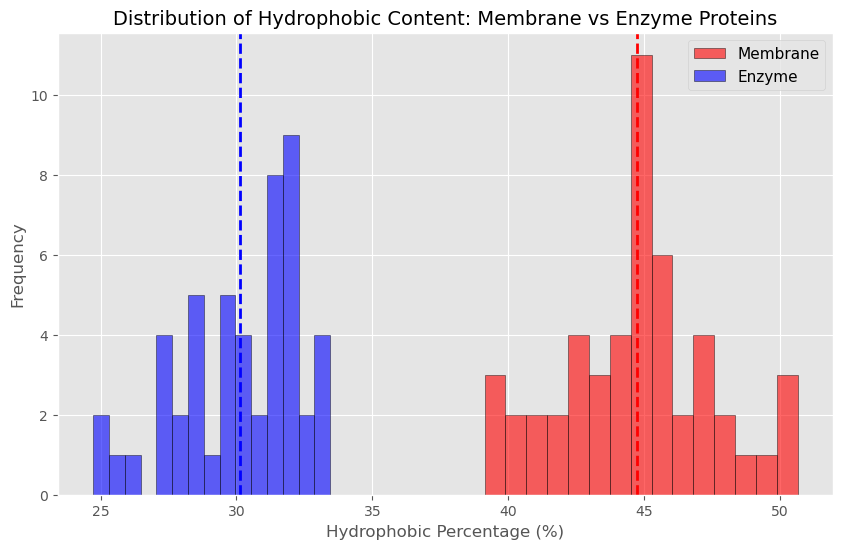

In [22]:
# Visualize distributions
plt.figure(figsize=(10, 6))
plt.hist(membrane.column('Hydrophobic_%'), bins=15, alpha=0.6, 
         color='red', edgecolor='black', label='Membrane')
plt.hist(enzyme.column('Hydrophobic_%'), bins=15, alpha=0.6, 
         color='blue', edgecolor='black', label='Enzyme')
plt.axvline(membrane_mean, color='red', linestyle='--', linewidth=2)
plt.axvline(enzyme_mean, color='blue', linestyle='--', linewidth=2)
plt.xlabel('Hydrophobic Percentage (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Hydrophobic Content: Membrane vs Enzyme Proteins', fontsize=14)
plt.legend(fontsize=11)
plt.show()

### A Possible starting question

Membrane proteins have higher hydrophobic content than enzyme proteins.

**Test Statistic:**  
Difference in mean hydrophobic percentage (Membrane - Enzyme)

### Suggested Research Questions


#### Question A: Charged Amino Acids in Enzymes
- **Question:** Do enzymes have more charged amino acids (K, R, H, D, E) than structural proteins?
- **Rationale:** Enzymes need charged residues at active sites for catalysis
- **Groups to compare:** Enzyme vs Structural
- **Feature to calculate:** Total charged percentage (positive + negative)

#### Question B: Small/Flexible Amino Acids in Structural Proteins
- **Question:** Do structural proteins have more glycine and proline (G, P) than other proteins?
- **Rationale:** Glycine (smallest) allows tight packing; proline creates kinks  
- **Groups to compare:** Structural vs Transport
- **Feature to calculate:** G + P percentage

#### Question C: Hydrophilic Amino Acids in Transport Proteins
- **Question:** Do transport proteins have more hydrophilic amino acids (S, T, N, Q, C) than membrane proteins?
- **Rationale:** Transport proteins often work in aqueous environments
- **Groups to compare:** Transport vs Membrane
- **Feature to calculate:** Hydrophilic percentage

#### Question D: Protein Length by Function
- **Question:** Are some protein classes significantly longer than others?
- **Rationale:** Functional complexity may correlate with protein length
- **Groups to compare:** Any two functional classes
- **Feature to analyze:** Length column (already in table)




## References and Further Reading

- **UniProt Database:** https://www.uniprot.org - Comprehensive protein sequence and functional information
- **Protein Data Bank (PDB):** https://www.rcsb.org - 3D protein structures
- Kyte, J. & Doolittle, R.F. (1982). "A simple method for displaying the hydropathic character of a protein." *J. Mol. Biol.* 157:105-132.
- **NCBI Protein Database:** https://www.ncbi.nlm.nih.gov/protein

---
---
## **Ecological Datasets** <a id="Ecology"></a>

## Ecological Footprint (DS1)
This dataset measures the amount of ecological resources are used from each country in the years 1961 to 2016.  More information can be found at: https://data.world/footprint/nfa-2019-edition

This data set appears to be clean, but there is a lack of metadata:

No units are provided. I believe areas are in hectares, and carbon is in metric tons.
QScore is explained here: https://www.footprintnetwork.org/data-quality-scores/
"total" column is not explained, but I think it is the total area (ha).

### Data Cleaning Issues:
* There are missing values in some of the columns.
* The "country" field includes "World," as a country, which could confound statistics.
* "forest_land" has both numbers and numbers in quotes that read in as strings.
* There is no "total land" column to put areas in perspective.

### Possible Hypothesis to Test:
The changes in land use over time could be interesting to investigate. China is a fascinating example where huge policy shifts drove change. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5036680/

In [ ]:
url = 'data/NFA 2019 public_data.csv'
ecoFootprint = Table.read_table(url, low_memory=False)
ecoFootprint.show(3)

---
---
## **Public Health and Medical** <a id="Medical">

---
# Heart Disease (DS2)
Data from Kaggle see [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

|variable|
|---|
|age|
|sex|
|chest pain type (4 values)|
|resting blood pressure|
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by fluoroscopy
thal: 0 = normal; 1 = fixed defect; 2 = reversible defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

target (0 = no heart disease and 1 = heart disease)


### Possible Hypothesis to Test:
This dataset is structured for machine learning to identify patients with or without heart disease. The data set is a good candidate for machine learning using k-nearest neighbor classification. See the EDS primer for succinct details in how to apply this algorithm from Lab 10: [k-Nearest Neighbors Classification](https://laserchemist.github.io/dprimer/k-Nearest_Neighbors_classification.html#). It would be interesting to compare the means of various columns for pos and neg patients.  Correlations are likely to exist as well. The data set is also a candidate for machine learning using k-means clustering.

In [ ]:
url = 'data/heart.csv'
heart = Table.read_table(url)
heart.show(3)

---
# Fetal Health (DS9)
Kaggle Dataset: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetricians into 3 classes:

fetal_health
* Normal (1)
* Suspect (2)
* Pathological (3)



### Data Cleaning Issues:

The data appear to be clean. Need to research the features obtained from Cardiotocograms.

### Possible Hypotheses:
Apart from explored correlations, this dataset would be an excellent one to try k-means prediction of fetal health.

In [ ]:
filename = "data/fetal_health.csv"
fetal = Table().read_table(filename)
fetal.show(3)

---
# Diabetes Prediction (DS10)
This data set is from Kaggle. https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

**Description:**

"The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes."

### Data Cleaning Issues:

While there are no missing values, the gender and smoking history columns needs to be converted to a numbers to model.

### Possible Hypotheses:
This data set is a good candidate for k-mean clustering to predict the whether a patient has diabetes. One could also explore correlation between fields, look at differences by gender, smoking history, etc.

In [ ]:
url = 'data/diabetes_prediction_dataset.csv'
diabetes = Table.read_table(url)
diabetes.show(3)

In [ ]:
diabetes.stats()

In [ ]:
np.unique(diabetes['smoking_history'])

__________________________

## **Chemistry** <a id="Chemistry"></a>

---
# Data Set #3: Periodic Table 

<img src="data/xkcd_periodic_table.png" width="600">

More information on columns: https://www.kaggle.com/datasets/berkayalan/chemical-periodic-table-elements?select=chemical_elements.csv  Of course, there are numerous references that discuss element groupings.
<br>An auxiliary data set is available in the to compliment the data in the original file.

### Data Cleaning Issues:
* The Discovery(Year) column includes "ancient" as a year.
* Some columns (e.g. Boiling point) load as strings because there are commas at the thousands place. and would need to be converted to numbers.

### Possible Hypothesis:
Does boiling point correlate with atomic weight?

In [ ]:
url = 'data/chemical_elements.csv'
auxdata = 'data/Periodic Table of Elements.csv'
ptdf = pd.read_csv(url, sep = ';')
pt = Table.from_df(ptdf)
pt.show(3)

In [ ]:
pt_aux = Table.read_table(auxdata)
pt_aux.show(3)

---
---
## **Environmental Science** <a id="Environmental Science"></a>

---
# Air Quality (DS5)

[From Kaggle:](https://www.kaggle.com/datasets/tawfikelmetwally/air-quality-dataset?resource=download)

**Content**
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city.
Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses.

Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities.

**Attribute Information:**

* 0-Date (DD/MM/YYYY)
* 1-Time (HH.MM.SS)
* 2-True hourly averaged concentration CO in mg/m^3 (reference analyzer)
* 3-PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
* 4-True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
* 5-True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
* 6-PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
* 7-True hourly averaged NOx concentration in ppb (reference analyzer)
* 8-PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
* 9-True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
* 10-PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
* 11-PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
* 12-Temperature in Â°C
* 13-Relative Humidity (%)
* 14-AH Absolute Humidity

### Data Cleaning Issues:
There are missing values (nans). Working with time series data can be tricky using tables; look at Lab 04 for useful functions.

### Possible Hypotheses to Test:

One could test whether there is a significant difference between Nitrous Oxide levels in the summer vs winter months. Exploring correlations between different contaminants would also be interesting. This is a rich data set, so there are many possibilities.

In [ ]:
url = 'data/Air Quality.csv'
air = Table.read_table(url)
air.show(3)

---
# Global Sustainable Energy Production (DS14)
Data set taken from Kaggle:

"Uncover this dataset showcasing sustainable energy indicators and other useful factors across all countries from 2000 to 2020. Dive into vital aspects such as electricity access, renewable energy, carbon emissions, energy intensity, Financial flows, and economic growth. Compare nations, track progress towards Sustainable Development Goal 7, and gain profound insights into global energy consumption patterns over time."

Metadata: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy

### Data Cleaning Issues:
Field names are overly long. Some fields have missing values.

### Possible Hypotheses:
Can investigate trends over time, differences in means between countries, correlation between fields -- many possibilities! For example, one could look for differences between the energy habits of richer (gdp_per_capita) and poorer nations.

In [ ]:
filename = "data/global-data-on-sustainable-energy.csv"
energy = Table.read_table(filename)
energy.show(3)

---
# Earthquakes in the East Coast of the US (DS6)
The East Coast of the US does not have nearly as many earthquakes as California, but as we experienced this semester they do happen! The earthquake data provided here were extracted for the region shown on the map below for the last century, from 1924 to 2024 (of course the monitoring of early earthquake is incomplete).
More information: https://earthquake.usgs.gov/earthquakes/map

<img src="data/earthquake_extraction_region.jpeg">


### Data Cleaning Issues:

There are missing values in many files. Information such as the state name will have to be extracted from the "place" column.

### Possible Hypothesis:
One might compare earthquakes in Pennsylvania and New York to see if there is a significant difference in the mean earthquake magnitude by state.

In [ ]:
url = 'data/east_coast_earthquakes.csv'
eq = Table.read_table(url)
eq.show(3)

---
# Steam Gauge data for the Pennypack Creek in Philadelphia (DS7)
The US Geological Survey has gauges on many US streams that collect data data continuously. The Pennypack Creek runs through Philadelphia.
See this website: https://waterdata.usgs.gov/monitoring-location/01467042/#parameterCode=00065&period=P7D&showMedian=true

### Possible relationship to explore: 

Turbidity (sediment in water) and Discharge (stream flow rate)

### Data Cleaning Issues:

Working with time series data can be tricky using tables; look at Lab 04 for useful functions.

#### Column Headers in the data set
```
# Data provided for site 01467042
#    TS_ID       Parameter Description
#    121360      00010     Temperature, water, degrees Celsius
#    121357      00060     Discharge, cubic feet per second
#    121358      00065     Gauge height, feet
#    121361      00095     Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius
#    121364      00300     Dissolved oxygen, water, unfiltered, milligrams per liter
#    121365      00301     Dissolved oxygen, water, unfiltered, percent of saturation
#    121362      00400     pH, water, unfiltered, field, standard units
#    277154      63680     Turbidity, water, unfiltered, monochrome near infra-red LED light, 780-900 nm, detection angle 90 +-2.5 degrees, formazin nephelometric units (FNU)
#
# Data value qualification codes included in this output:
#     P  Provisional data subject to revision.
#     <  Actual value is known to be less than reported value.
```

In [ ]:
url = 'data/penny_pack.csv'
pp = Table.read_table(url)
pp.show(3)

---
# Weather Data (DS8)
Data from a Weather Underground station in the South Kensington neighborhood of Philadelphia
South Kensington - KPAPHILA131: https://www.wunderground.com/dashboard/pws/KPAPHILA131

The data are hourly from December 2019 to January 2021.

### Data Cleaning Issues:

Working with time series data can be tricky using tables; look at Lab 04 for useful functions. To compare data by month requires parsing the date information.

### Possible Hypotheses
There are many interesting relationships to explore, such as between barometric pressure trends and precipitation, or seasonal differences in rainfall, temperature, etc.

In [ ]:
url = 'data/KPAPHILA131_20191217_to_20211119.csv'
weather = Table.read_table(url)
weather.show(3)

In [ ]:
## might be also useful to have population for looking at Philly Vaccination Rates
url = "https://raw.githubusercontent.com/DataScienceTempleFirst/code-cod/main/PA_zip_pop.csv"
paPop = Table.read_table(url)
paPop.sort("pop",descending=True)
paPop.where('county','Philadelphia').show(3)

---
# CAMELS Hydrology Dataset (DS9)

The CAMELS (Catchment Attributes and Meteorology for Large-sample Studies) dataset is an important benchmark dataset for hydrological modeling. For the final project, a curated subset of the climatic, hydrological, topographic, and vegetation characteristics of ~650 watersheds across the US has been selected. The data are from a wide variety of sources, but the hydrological attributes are from the US Geological Survey. The attributes were downloaded from https://ral.ucar.edu/solutions/products/camels 

You can read more about the dataset in the peer-reviewed paper here: https://hess.copernicus.org/articles/21/5293/2017/ 

There are two files that will be useful:
- The description of columns and data sources can be found in `data/camels_attributes_eds.csv`
- The data itself can be found in `data/camels_assembled.csv`

### Data Cleaning Issues

None.

### Possible Hypotheses
Such a large data set opens up many possibilities. How does aridity affect mean runoff? How does precipitation affect low flows (e.g., Q5, the 5th percentile of daily runoff, or zero_q_freq, the % of days with no streamflow)? How does snow cover affect the runoff ratio (ratio runoff/precipitation)? Do forested watersheds have higher low flows than non-forested watersheds? Do arid (aridity >= 1) watersheds have different runoff ratio than humid (aridity < 1) watersheds?

You will find lots of scatter in your data. KNN regression could be a useful tool. Linear regression may work in some cases, but first, evaluate whether the relation you are trying to predict is justifiably linear. If you are going to do a hypothesis test, try to pick a physically meaningful test statistic. 


In [ ]:
attributes = Table.read_table('data/camels_attributes_eds.csv')
attributes

In [ ]:
camels = Table.read_table('data/camels_assembled.csv')
camels

---
---
## **General Datasets**  <a id="General"></a>

---
# Student Performance in Secondary Education (DS18)

## Dataset Overview

This dataset examines factors that influence student achievement in secondary education (high school) from two Portuguese schools. The data was collected using school reports and student questionnaires, and includes information about student grades, demographics, family background, and school-related factors.

**Source:** UCI Machine Learning Repository  
**Original Study:** Cortez & Silva (2008), "Using Data Mining to Predict Secondary School Student Performance"  
**Sample Size:** 395 students (Mathematics course) or 649 students (Portuguese language course)  
**Time Period:** Data collected from two Portuguese secondary schools (Gabriel Pereira and Mousinho da Silveira)

## Why This Dataset Matters

Understanding what factors contribute to student success is crucial for educators, policymakers, and families. This dataset allows us to explore questions like:

- Does having internet access at home affect academic performance?
- Do students with parental support perform differently than those without?
- How does study time relate to final grades?
- Are there differences in achievement based on gender, family structure, or socioeconomic factors?

By analyzing this data, we can identify factors that may help or hinder student success, which could inform school policies and support programs.



## Dataset Variables (33 total)

### Student Demographics
- **age** - Student's age (15-22 years)
- **sex** - Gender (M=male, F=female)
- **address** - Home location (U=urban, R=rural)
- **famsize** - Family size (LE3 = ≤3 members, GT3 = >3 members)

### Family Background
- **Medu** - Mother's education level (0=none, 1=primary, 2=5th-9th grade, 3=secondary, 4=higher education)
- **Fedu** - Father's education level (same scale)
- **Mjob** - Mother's occupation (teacher, health, services, at_home, other)
- **Fjob** - Father's occupation (same categories)
- **Pstatus** - Parent cohabitation status (T=living together, A=apart)
- **guardian** - Student's guardian (mother, father, or other)

### School-Related Factors
- **school** - Which school (GP=Gabriel Pereira, MS=Mousinho da Silveira)
- **traveltime** - Home to school travel time (1=<15 min, 2=15-30 min, 3=30min-1hr, 4=>1hr)
- **studytime** - Weekly study time (1=<2hrs, 2=2-5hrs, 3=5-10hrs, 4=>10hrs)
- **failures** - Number of past class failures (0-4)
- **schoolsup** - Extra educational support (yes/no)
- **famsup** - Family educational support (yes/no)
- **paid** - Extra paid classes/tutoring (yes/no)
- **activities** - Participates in extracurricular activities (yes/no)
- **nursery** - Attended nursery school (yes/no)
- **higher** - Wants to pursue higher education (yes/no)
- **internet** - Internet access at home (yes/no)
- **romantic** - In a romantic relationship (yes/no)

### Personal & Social Factors
- **famrel** - Quality of family relationships (1=very bad to 5=excellent)
- **freetime** - Free time after school (1=very low to 5=very high)
- **goout** - Going out with friends (1=very low to 5=very high)
- **Dalc** - Workday alcohol consumption (1=very low to 5=very high)
- **Walc** - Weekend alcohol consumption (1=very low to 5=very high)
- **health** - Current health status (1=very bad to 5=very good)
- **absences** - Number of school absences (0-93 days)

### **Academic Outcomes** (Our Target Variables!)
- **G1** - First period grade (0-20 scale)
- **G2** - Second period grade (0-20 scale)
- **G3** - **Final grade (0-20 scale)** ← **PRIMARY OUTCOME**


## Research Questions to Explore

### Comparison Questions
- Do male and female students achieve different mean final grades?
- Does having internet access at home correlate with better academic performance?
- Do students receiving extra educational support perform differently than those who don't?
- Is there a difference in achievement between urban and rural students?

### Correlation Questions
- Is there a relationship between weekly study time and final grades?
- Does parental education level correlate with student achievement?
- How do school absences relate to academic performance?

### Predictive Questions
- Can we predict final grades (G3) from first period grades (G1)?
- What combination of factors best predicts student success?
- Can we identify students at risk of failing based on early indicators?

---

## Important Considerations

### Statistical Notes
- **Correlation ≠ Causation:** If two variables are correlated, it doesn't mean one causes the other. For example, students with internet access may perform better, but this could be because wealthier families have both internet and other educational advantages.

- **Multiple Testing:** When testing many variables, some relationships may appear significant by chance. Be careful about drawing strong conclusions from exploring 30+ variables.

- **Effect Sizes:** A statistically significant result isn't always practically meaningful. Always consider the magnitude of differences, not just p-values.

### Ethical Considerations
- This data represents real students and their educational experiences
- Avoid making stereotypical generalizations about groups
- Consider systemic and structural factors, not just individual characteristics
- Think about how findings could be used to help students, not label or limit them

---

## How to Load the Data

```python
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Mathematics dataset
# Important: This CSV uses semicolons (;) as separators, not commas!
students = Table.read_table('student-mat.csv', sep=';')

# Display basic information
print(f"Number of students: {students.num_rows}")
print(f"Number of variables: {students.num_columns}")

# Show first few rows
students.show(5)
```

## Citation

When using this dataset in your analysis, cite:

**Cortez, P., & Silva, A. M. G. (2008).** Using data mining to predict secondary school student performance. *Proceedings of 5th Annual Future Business Technology Conference*, Porto, Portugal, pp. 5-12.

**Dataset:** Cortez, P. (2008). Student Performance [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T

**License:** Creative Commons Attribution 4.0 International (CC BY 4.0) - Free to use with attribution



## Let's Begin!

Now that you understand the dataset, you're ready to explore the data and test hypotheses about factors that influence student success!

In [9]:
# Load the Mathematics dataset
# Important: This CSV uses semicolons (;) as separators, not commas!
students = Table.read_table('data/student-mat.csv', sep=';')

# Display basic information
print(f"Number of students: {students.num_rows}")
print(f"Number of variables: {students.num_columns}")

# Show first few rows
students.show(5)


Number of students: 395
Number of variables: 33


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


---
# Philadelphia Open Data School Graduation Rates (DS11)
This longitudinal open data file includes information about the graduation rates for schools broken out by: graduation rate type (four-year, five-year, or six-year), demographic category (EL status, IEP status, Economically Disadvantaged Status, Gender, or Ethnicity), and ninth-grade cohort. Students are attributed to the last school at which they actively attended in the respective graduation window, which ends on September 30 each year. Students are classified as EL, as having an IEP, and/or economically disadvantaged if they were designated as such at any point during their high school career.
see: https://www.philasd.org/performance/programsservices/open-data/school-performance/#school_graduation_rates 
see also: https://www.philasd.org/research/wp-content/uploads/sites/90/2020/05/graduation-rate-definitions-and-trends-may-2020.pdf

The 'group' column can be used with the `.where()` Table method to select a particular comparison such as Economically Disadvantaged which then has two subgroups for comparison.

### Data Cleaning Issue:
Some of the fields have mixed numerical and text data (e.g., num, score), with the code "s" where a score was not calculated.
<br>A dataset with the score computed as a floating point number but with the Table rows with "s" removed is available for analysis:<br>
```python
fscore_grad = 'data/Philly_grad_fscore.csv'
```
### Possible Hypotheses
Many possibilities. One could look at whether there is a statistically significance difference in scores between two schools, investigate trends over time, or look at different groups an subgroups. Keep in mind that this a limited data set covering a socially sensitive topic, so do not draw overly broad conclusions.

In [ ]:
url = "https://cdn.philasd.org/offices/performance/Open_Data/School_Performance/Graduation_Rates/SDP_Graduation_Rates_School_S_2022-05-23.csv"
grad = Table.read_table(url)
grad.show(3)

In [ ]:
fscore_grad = 'data/Philly_grad_fscore.csv'
fgrad = Table.read_table(fscore_grad)
fgrad.show(3)

---
# Jeopardy (DS12)
see: https://www.jeopardy.com<br>
data source: https://anuparna.github.io/jeopardy/<br>
<br>In the outcome Table there is a dj_score which is before final jeopardy in which wagers are made. The final score which determines the winner is the one who correctly wagers and adds or does not lose to much to come to a final score based one whether they are correct and their wager. It could help to put an array into new column to compute the final score to find winner of each game: 
```python
final_score = outcome['dj_score'] + outcome['wager']*outcome['correct'] - outcome['wager']*(outcome['correct']==0)
```
### Data Cleaning Issues:
Multiple table to join. Some fields have missing values.

### Possible Hypothesis to Test:
Do returning champions score better? Does seating position matter? There are many imaginative possibilities to investigate.

In [ ]:
contestant = "https://raw.githubusercontent.com/anuparna/jeopardy/master/dataset/contestants.csv"
locations =  "https://raw.githubusercontent.com/anuparna/jeopardy/master/dataset/locations.csv"
results =  "https://raw.githubusercontent.com/anuparna/jeopardy/master/dataset/final_results.csv"
loc = Table.read_table(locations)
contest = Table.read_table(contestant)
outcome = Table.read_table(results)
outcome.show(3)

In [ ]:
contest.show(3)

---
# Crime Data for Philadelphia (DS13)
The data came from OpenDataPhilly: https://opendataphilly.org/datasets/crime-incidents
Reported incidents cover the full year of 2023.

### Data Cleaning Issues:
To extract months you would need to parse the date data. Working with time series data can be tricky using tables; look at Lab 04 for useful functions. To compare data by month requires parsing the date information.

### Possible Hypotheses:
Possible correlation: type of crime and time of day. Could look at where at particular type of crime occurs more frequency at particular time of day or whether the number of crimes is significantly different in different months.

In [ ]:
url = 'data/Philly_crime_2023.csv'
crime = Table.read_table(url)
crime.show(3)

---
# Motor Vehicle Crash Data for Staten Island in 2023 (DS15)

This data set came from Data.gov. The accident data file for New York city is huge, so it has been trimmed to just Staten Island in 2023.

https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes

"The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage (https://www.nhtsa.gov/sites/nhtsa.dot.gov/files/documents/ny_overlay_mv-104an_rev05_2004.pdf). It should be noted that the data is preliminary and subject to change when the MV-104AN forms are amended based on revised crash details.For the most accurate, up to date statistics on traffic fatalities, please refer to the NYPD Motor Vehicle Collisions page (updated weekly) or Vision Zero View (updated monthly)."

### Data Cleaning Issues

Some fields have missing values. May need to parse dates.

### Possible Hypotheses
Such a large data set opens up many possibilities. Compare percent of accidents resulting in fatalities by vehicle type? How about in two-vehicle accidents? Are certain months statistically more likely to have accidents? Certain zipcodes (may need to look for populations data to convert to per capita)? 


In [ ]:
filename = 'data/StatenIsland_crash_data_2023.csv'
crash = Table.read_table(filename)
crash.show(3)